<a href="https://colab.research.google.com/github/vmcarranzam/econometriaR/blob/main/Lab3_Econometria_en_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(dplyr)
library(ggplot2)
#library(corrplot)
#library(PerformanceAnalytics)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




# EJERCICIO 1

Utilizando R realice una función que dado un dataframe cualquiera de dos columnas, donde la primera (índice 1) sea el valor de la variable independiente (X) y la segunda sea el valor de una variable dependiente (Y), devuelva una lista con los siguientes elementos:

1. Un arreglo con los valores de los estimadores para b1 y b0
2. El valor del coeficiente de determinación del modelo.
3. El coeficiente de correlación r (raíz cuadrada del inciso anterior).
4. Un arreglo con los valores de los residuos.
5. Una gráfica con la nube de puntos y la recta de regresión del modelo.

In [35]:
calcular_regresion <- function(data, col_x, col_y) {
  # Extraigo las columnas del dataframe
  x <- data[[col_x]]
  y <- data[[col_y]]

  # 1. Calculo los estimadores de beta1 y beta0
  n <- length(x)
  beta_1 <- (sum(x * y) - n * mean(x) * mean(y)) / (sum(x^2) - n * mean(x)^2)
  beta_0 <- mean(y) - beta_1 * mean(x)
  estimadores <- c(beta_0, beta_1)

  # 2. Calculo el coeficiente de determinación
  y_pred <- beta_0 + beta_1 * x
  ssr <- sum((y_pred - mean(y))^2)
  sse <- sum((y - y_pred)^2)
  sst <- sum((y - mean(y))^2)
  r_cuadrado <- ssr / sst

  # 3. Calculo el coeficiente de correlación
  r <- sqrt(r_cuadrado)

  # 4. Calculo los residuos
  residuos <- y - y_pred

  # 5. Gráficola nube de puntos con la recta de regresión
  df <- data.frame(x = x, y = y, y_pred = y_pred)
  grafica <- ggplot(df, aes(x = x, y = y)) +
    geom_point() +
    geom_line(aes(y = y_pred), color = "red") +
    labs(x = colnames(data)[col_x], y = colnames(data)[col_y])

  # Retorno los resultados en una lista
  resultados <- list(estimadores = estimadores,
                     r_cuadrado = r_cuadrado,
                     r = r,
                     residuos = residuos,
                     grafica = grafica)
  return(resultados)
}

Creo un dataset de prueba

In [9]:
n <- 100
set.seed(33)
X <- runif(n, min = 0, max = 10)
Y <- 2*X + rnorm(n, mean = 0, sd = 1)
df1 <- data.frame(X, Y)


In [36]:
resultados <- calcular_regresion(df1,"X","Y")

$estimadores
[1] -0.1510539  2.0556441

$r_cuadrado
[1] 0.9639163

$r
[1] 0.9817924

$residuos
  [1] -0.636676011 -1.569346821  0.149785502 -0.326019533 -1.313789353
  [6] -0.907121175 -0.670261258 -0.972883892 -2.034575062 -0.428711471
 [11] -0.144320672  0.300599133  0.718018135 -1.651119686 -0.096119761
 [16] -0.240767071 -0.453861826 -1.463786017 -0.293668166  0.101278301
 [21]  1.461854853  2.050572671 -0.283753101 -0.483165114  0.802994127
 [26]  1.381639006  0.952256143 -1.564895269  2.460043707  0.505068426
 [31] -1.615744966  0.631591952 -0.612163620  2.070914082 -1.084120373
 [36] -0.092539487  0.755095360 -1.756504375  0.811203095 -1.316739634
 [41] -0.401902130  1.551297143 -0.794901289 -0.351593802 -2.059245579
 [46]  1.942218892 -0.892685079  0.549871435 -1.329100013 -0.746157398
 [51]  1.013549514 -0.309120546 -0.825708538 -1.724683634  1.971065973
 [56] -2.966194906  0.297919261 -0.704810799  0.534888304 -0.193212920
 [61]  1.631318543 -0.744026060 -0.381418253  0.70506

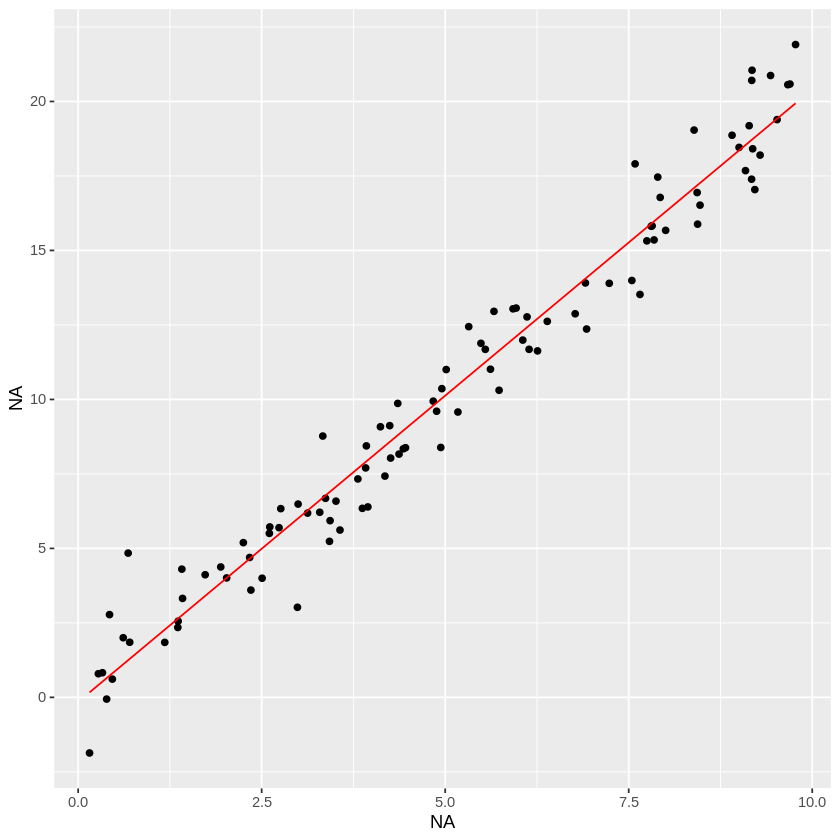

In [37]:
print(resultados)